In [1]:
from riskyneuroarousal.utils.load_data import load_pt_results, load_ddm_results, load_behavioral_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
%load_ext rpy2.ipython

In [2]:
ddm_results = load_ddm_results()
starting_point = ddm_results.query("model_ID == 1 & param_name == 'z'")[["mean", "sub"]]
data = starting_point.rename(columns={"mean": "starting_point"})

In [3]:
pt_results = load_pt_results().query("param_name == 'lambda'")[["sub", "condition", "param_value"]]
pt_results = pt_results.rename(columns={"param_value": "pt_lambda"})
data = data.merge(pt_results, on="sub")

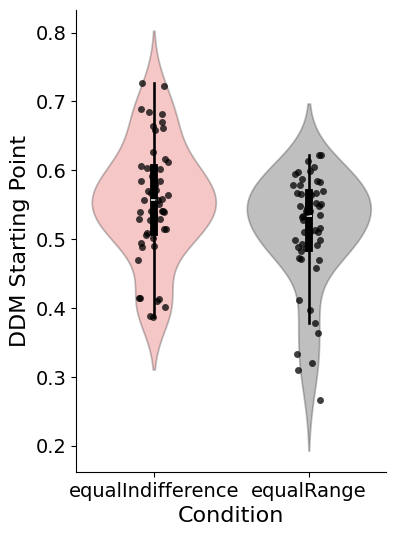

In [15]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=data, x="condition", y="starting_point", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=data, x="condition", y="starting_point", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("DDM Starting Point", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [5]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [13]:
print("Starting point")
print(ttest_ind(data.query("condition == 'equalIndifference'")["starting_point"].values, data.query("condition == 'equalRange'")["starting_point"].values))
print(cohend(data.query("condition == 'equalIndifference'")["starting_point"].values, data.query("condition == 'equalRange'")["starting_point"].values))
print(np.mean(data.query("condition == 'equalIndifference'")["starting_point"].values), np.mean(data.query("condition == 'equalRange'")["starting_point"].values))

Starting point
TtestResult(statistic=np.float64(2.629150461819305), pvalue=np.float64(0.009832222546389833), df=np.float64(106.0))
0.5059802422904682
0.5549930448555797 0.5127919760567338


In [14]:
print("Starting point")
print(ttest_ind(data.query("condition == 'equalIndifference'")["pt_lambda"].values, data.query("condition == 'equalRange'")["pt_lambda"].values))
print(cohend(data.query("condition == 'equalIndifference'")["pt_lambda"].values, data.query("condition == 'equalRange'")["pt_lambda"].values))
print(np.mean(data.query("condition == 'equalIndifference'")["pt_lambda"].values), np.mean(data.query("condition == 'equalRange'")["pt_lambda"].values))

Starting point
TtestResult(statistic=np.float64(5.1401501473112905), pvalue=np.float64(1.2614269575731035e-06), df=np.float64(106.0))
0.9892223570750894
1.477367230997721 1.1215816624005501


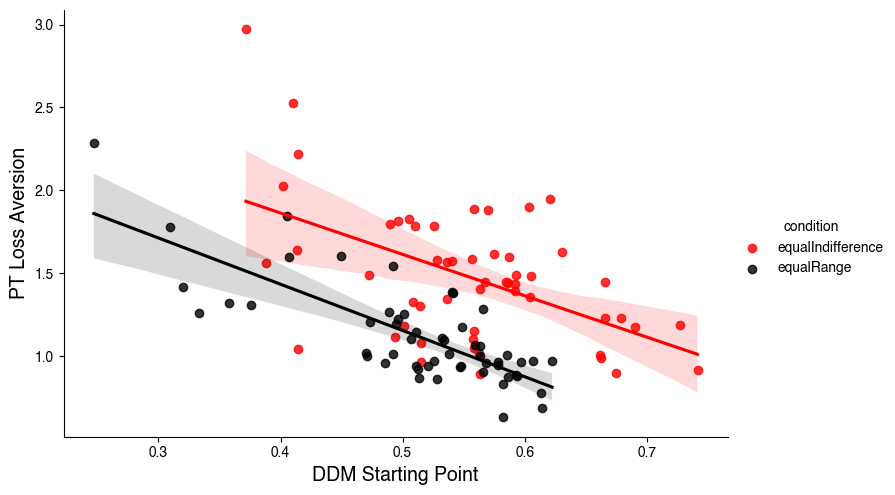

In [33]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
plt.rcParams["font.family"] = "Helvetica"
sns.lmplot(x="starting_point", y="pt_lambda", data=data, hue="condition", palette=custom_palette, height=5, aspect=1.5)
plt.xlabel("DDM Starting Point", fontsize=14)
plt.ylabel("PT Loss Aversion", fontsize=14)
plt.show()